<center><H2>EE 679 Speech Processing</H2>
<H2>Computing Assignment 2: Linear predictive analysis and synthesis</H2>
<H2>Praveen Agrawal</H2>
<H2>12D020030</H2></center>

In [34]:
%matplotlib inline
from __future__ import division
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write
import scipy.io.wavfile as wav

<b>A. Synthesized vowel:</b> Consider the synthesized vowel /a/ (formants: 730, 1090, 2440 Hz;
bandwidths: 50 Hz) at two fundamental frequencies: 120 Hz, 300 Hz. Sampling rate = 8 kHz.
Using a 30 ms Hamming window, implement LP analysis on a single segment using LP orders
2, 4, 6, 8, 10 using the Levinson algorithm. Compute the gain, and plot the LP spectrum
magnitude (i.e. the dB magnitude frequency response of the estimated all-pole filter) for
each order "p". Superimpose each plot on the original 6-pole spectral envelope with the
discrete harmonic components shown. Comment on the characteristics of the spectral
approximations of different orders

Gain for /a/ of F0 = 120 Hz for LP order  2  is  7.72713023704
LP coefficients for the same are
[ 1.          1.45847659 -0.92856296  0.          0.          0.          0.
  0.          0.          0.          0.        ]


C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


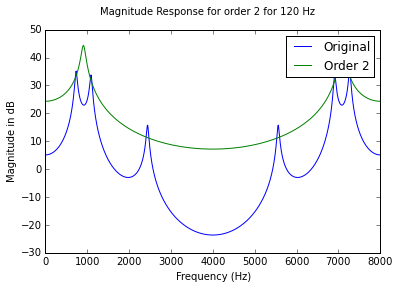

Gain for /a/ of F0 = 300 Hz for LP order  2  is  10.6906840267
LP coefficients for the same are
[ 1.          1.22042859 -0.70856644  0.          0.          0.          0.
  0.          0.          0.          0.        ]


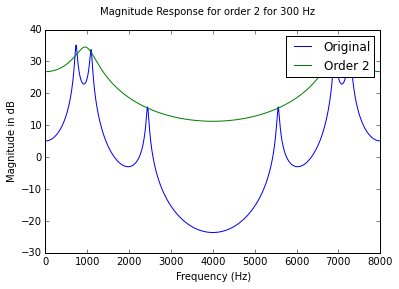

Gain for /a/ of F0 = 120 Hz for LP order  4  is  6.83262248964
LP coefficients for the same are
[ 1.          1.86124002 -1.88882732  0.95156231 -0.36663528  0.          0.
  0.          0.          0.          0.        ]


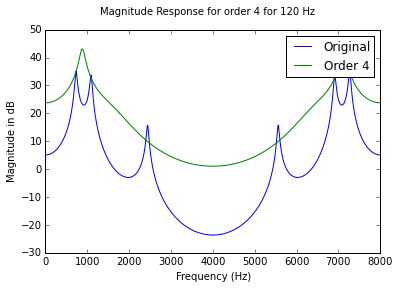

Gain for /a/ of F0 = 300 Hz for LP order  4  is  7.93547110956
LP coefficients for the same are
[ 1.          1.15612874 -1.08766141  0.74790288 -0.66919285  0.          0.
  0.          0.          0.          0.        ]


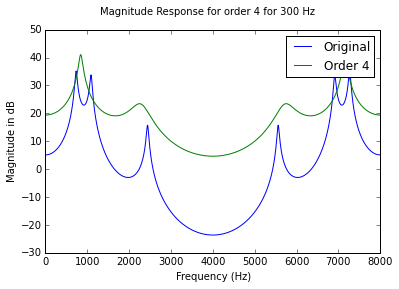

Gain for /a/ of F0 = 120 Hz for LP order  6  is  2.48760368184
LP coefficients for the same are
[ 1.          2.29907577 -3.13324673  3.06239042 -3.03866636  2.17074247
 -0.92203558  0.          0.          0.          0.        ]


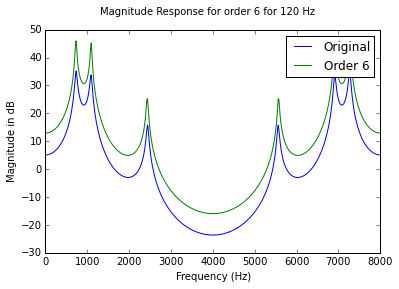

Gain for /a/ of F0 = 300 Hz for LP order  6  is  5.01533049361
LP coefficients for the same are
[ 1.          1.94430618 -2.37072056  2.26593671 -2.30313792  1.54633438
 -0.57993024  0.          0.          0.          0.        ]


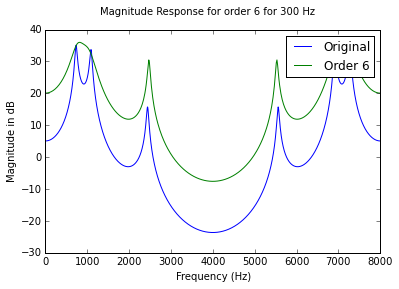

Gain for /a/ of F0 = 120 Hz for LP order  8  is  2.48621737896
LP coefficients for the same are
[ 1.          2.27138923 -3.05548256  2.9415115  -2.90521303  2.03479659
 -0.81018801 -0.06141069  0.01362095  0.          0.        ]


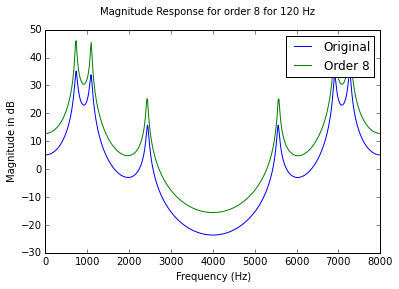

Gain for /a/ of F0 = 300 Hz for LP order  8  is  4.65816030674
LP coefficients for the same are
[ 1.          1.82304463 -1.88576907  1.3740693  -1.26548048  0.48506443
  0.41445089 -0.66976705  0.19950299  0.          0.        ]


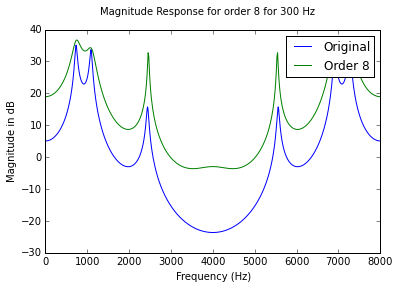

Gain for /a/ of F0 = 120 Hz for LP order  10  is  2.48542419889
LP coefficients for the same are
[ 1.          2.27084915 -3.05401413  2.95507986 -2.92232633  2.04283512
 -0.80244174 -0.06758627  0.03462962 -0.02697864  0.01913781]


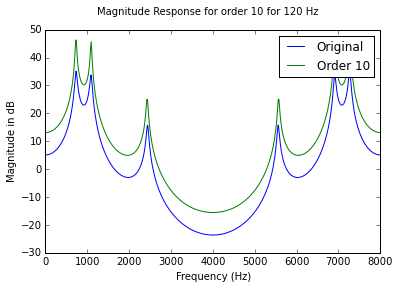

Gain for /a/ of F0 = 300 Hz for LP order  10  is  4.50153057742
LP coefficients for the same are
[ 1.          1.81918572 -1.86170519  1.21104444 -1.08579223  0.44447811
  0.26141407 -0.52049725 -0.08397963  0.33939044 -0.23822877]


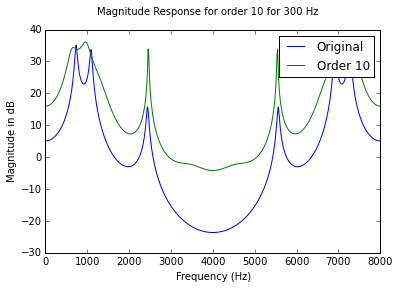

In [35]:
B = 50
Fs = 8000
duration = 50/1000		#50 ms sound suration

def vowel(F0, F1, F2, F3):
	r = np.exp(-B*pi/Fs)	#Pole radius
	theta = [2*pi*F1/Fs, 2*pi*F2/Fs, 2*pi*F3/Fs]
	time = np.linspace(0, duration, duration*Fs)
	a1 = [1, -r*np.exp(-1j*theta[0])-r*np.exp(1j*theta[0]), r*r]
	a2 = [1, -r*np.exp(-1j*theta[1])-r*np.exp(1j*theta[1]), r*r]
	a3 = [1, -r*np.exp(-1j*theta[2])-r*np.exp(1j*theta[2]), r*r]
	x = np.zeros(int(duration*Fs))
	y = np.zeros(int(duration*Fs))
	temp1 = np.zeros(int(duration*Fs))
	temp2 = np.zeros(int(duration*Fs))
	for i in range(0, int(duration*F0)):
		x[i*int(np.floor(Fs/F0))] = 1
  
	temp1[0] = x[0]
	temp1[1] = x[1] - a1[1].real*temp1[0]	# a1[0] not written since a1[0] = 1
	for i in range(2, int(duration*Fs)):
			temp1[i] = x[i] - a1[1].real*temp1[i-1] - a1[2].real*temp1[i-2]
	
	temp2[0] = temp1[0]
	temp2[1] = temp1[1] - a2[1].real*temp2[0]	# a2[0] not written since a2[0] = 1
	for i in range(2, int(duration*Fs)):
			temp2[i] = temp1[i] - a2[1].real*temp2[i-1] - a2[2].real*temp2[i-2]
		
	y[0] = temp2[0]
	y[1] = temp2[1] - a3[1].real*y[0]	# a3[0] not written since a3[0] = 1
	for i in range(2, int(duration*Fs)):
			y[i] = temp2[i] - a3[1].real*y[i-1] - a3[2].real*y[i-2]

	w = np.linspace(0, 2*pi, Fs/2);
	z = np.exp(-1*1j*w);
	H1 = 1/(a1[0] + a1[1].real*z + a1[2]*z*z);
	H2 = 1/(a2[0] + a2[1].real*z + a2[2]*z*z);
	H3 = 1/(a3[0] + a3[1].real*z + a3[2]*z*z);
	H = H1*H2*H3
	return (y, H)

def LPanalysis(signal, p, windowLength):	#p = LP order
	#Windowing
	duration = signal.shape[-1]
	window = signal[(duration-int((windowLength)*Fs))/2.0:(duration+int((windowLength)*Fs))/2.0]*np.hamming(windowLength*Fs);
	R = np.correlate(signal,signal, mode = 'full')	#Autocorrelation
	R = R[-(len(signal)):len(R)];	#Keep autocorrelation values for positive values of i in summation(x[n]x[n-i])
    
	#Levinson Algorithm
	E = np.zeros(p+1);	#Vector to store error values
	a = np.zeros((p+1,p+1));
	G = np.zeros(p+1);
	E[0] = R[0];	#Initial Condition
	for i in range(1, p+1):		# 1 <= i <= p
		temp = 0;
		for j in range(1, i):	# 1 <= j <= i-1
			temp = temp + a[i-1][j] * R[i-j];
		k = (R[i] - temp)/E[i-1];
		a[i][i] = k;
		for j in range(1, i):	# 1<=j<=i-1
			a[i][j] = a[i-1][j] - k * a[i-1][i-j];
		E[i] = (1 - (k*k)) * E[i-1];
		G[i] = np.sqrt(E[i]);
		a[i][0] = 1;
	return(G, a);

a120, H120 = vowel(120, 730, 1090, 2440);
a300, H300 = vowel(300, 730, 1090, 2440);

windowLength = .03		#30 ms
G1, a1 = LPanalysis(a120, 10, windowLength);
G2, a2 = LPanalysis(a300, 10, windowLength);
P = [2,4,6,8,10];

for p in P:
	print("Gain for /a/ of F0 = 120 Hz for LP order ",p," is ", G1[p]);
	print("LP coefficients for the same are");
	print(a1[p]);
	a1[p][1:len(a1[p])] = -a1[p][1:len(a1[p])]
	w1, h1 = signal.freqz(G1[p], a1[p], None, 1);
	fig = plt.figure()
	w = np.linspace(0, 2*pi, Fs/2);
	plt.plot(w*Fs/(2*pi), 20*np.log10(abs(H120)))
	plt.plot(w1*Fs/(2*pi), 20*np.log10(abs(h1)))
	fig.suptitle('Magnitude Response for order '+str(p)+' for 120 Hz')
	plt.ylabel('Magnitude in dB')
	plt.xlabel('Frequency (Hz)')
	plt.legend(['Original', 'Order '+str(p)])
	plt.show()

	print("Gain for /a/ of F0 = 300 Hz for LP order ",p," is ", G2[p]);
	print("LP coefficients for the same are");
	print(a2[p]);
	a2[p][1:len(a2[p])] = -a2[p][1:len(a2[p])]
	w2, h2 = signal.freqz(G2[p], a2[p], None, 1);
	fig = plt.figure()
	w = np.linspace(0, 2*pi, Fs/2);
	plt.plot(w*Fs/(2*pi), 20*np.log10(abs(H300)))
	plt.plot(w2*Fs/(2*pi), 20*np.log10(abs(h2)))
	fig.suptitle('Magnitude Response for order '+str(p)+ ' for 300 Hz')
	plt.ylabel('Magnitude in dB')
	plt.xlabel('Frequency (Hz)')
	plt.legend(['Original', 'Order '+str(p)])
	plt.show()

We can see that the estimated LPC spectrum approximates the real signal spectrum better with increasing
LPC order. The LPC spectrum tends to converge towards the signal spectrum with increasing order. This is because increasing LPC order means more poles in the tranfer function and hence more variability.

Also we see that the LPC sprectrum approximation is better in case of 120 Hz signal as compared to the 300 Hz signal.

<b>B. Natural speech:</b> Consider the speech signal in “machali.wav” (male voice), sampled at 8 kHz.
Consider the following signal segments in the final word “pani”: (1) /a/ (first half); (2) /n/; (3) /I/;
and (4) /s/ in the word “uska”.
Use PRAAT to extract the above segments to separate .wav files for further analyses as below.
(Note: for /s/, 16 kHz sampled audio is better.)<br>
<b>Question 1.</b> Compute and plot the narrowband spectrum using a Hamming window of duration = 30 ms
before and after pre-emphasis.

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


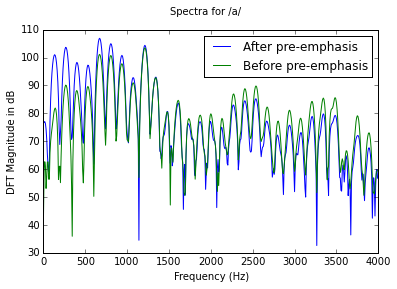

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:48: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:49: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


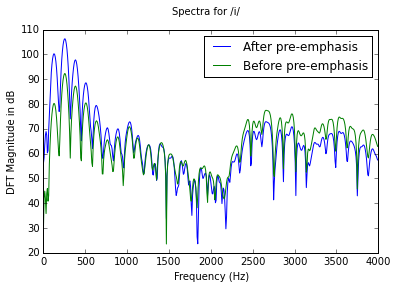

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:57: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:58: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


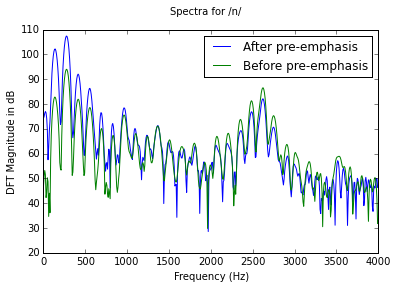

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:67: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


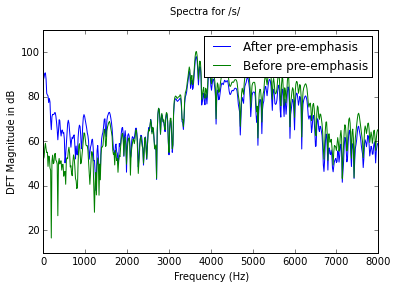

In [36]:
def preEmphasis(x):
    a = 0.985;
    y = np.zeros(len(x));
    for i in range(1, len(x)):
        y[i] = x[i] - a*x[i-1];
    return y

def NarrowBandSpectrum(x, Fs, windowLength):
    window = x[int(len(x)/2)-int(windowLength/2*Fs):int(len(x)/2)+int(windowLength/2*Fs)] * np.hamming(windowLength*Fs);
    fourierTransform = np.fft.fft(window, 1024);
    frequency = np.fft.fftfreq(fourierTransform.shape[-1], 1/float(Fs))
    return fourierTransform, frequency

#Reading the wav files of the four segments
FsA, signalA = wav.read('a.wav');
FsI, signalI = wav.read('i.wav');
FsN, signalN = wav.read('n.wav');
FsS, signalS = wav.read('s.wav');

#Pre-emphasis
preEmphasizedA = preEmphasis(signalA);
preEmphasizedI = preEmphasis(signalI);
preEmphasizedN = preEmphasis(signalN);
preEmphasizedS = preEmphasis(signalS);

#Narrow Band Spectrum before pre-emphasis
preEmphasizedSpectrumA, frequency1A = NarrowBandSpectrum(signalA, FsA, .03);
preEmphasizedSpectrumI, frequency1I = NarrowBandSpectrum(signalI, FsI, .03);
preEmphasizedSpectrumN, frequency1N = NarrowBandSpectrum(signalN, FsN, .03);
preEmphasizedSpectrumS, frequency1S = NarrowBandSpectrum(signalS, FsS, .03);

#Narrow Band Spectrum after pre-emphasis
SpectrumA, frequency2A = NarrowBandSpectrum(preEmphasizedA, FsA, .03);
SpectrumI, frequency2I = NarrowBandSpectrum(preEmphasizedI, FsI, .03);
SpectrumN, frequency2N = NarrowBandSpectrum(preEmphasizedN, FsN, .03);
SpectrumS, frequency2S = NarrowBandSpectrum(preEmphasizedS, FsS, .03);

fig = plt.figure()
plt.plot(frequency1A[:int(len(frequency1A)/2)], 20*np.log10(np.abs(preEmphasizedSpectrumA[:len(preEmphasizedSpectrumA)/2])))
plt.plot(frequency2A[:int(len(frequency2A)/2)], 20*np.log10(np.abs(SpectrumA[:len(SpectrumA)/2])))
fig.suptitle('Spectra for /a/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.legend(['After pre-emphasis', 'Before pre-emphasis'])
plt.show()

fig = plt.figure()
plt.plot(frequency1I[:int(len(frequency1I)/2)], 20*np.log10(np.abs(preEmphasizedSpectrumI[:len(preEmphasizedSpectrumI)/2])))
plt.plot(frequency2I[:int(len(frequency2I)/2)], 20*np.log10(np.abs(SpectrumI[:len(SpectrumI)/2])))
fig.suptitle('Spectra for /i/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.legend(['After pre-emphasis', 'Before pre-emphasis'])
plt.show()

fig = plt.figure()
plt.plot(frequency1N[:int(len(frequency1N)/2)], 20*np.log10(np.abs(preEmphasizedSpectrumN[:len(preEmphasizedSpectrumN)/2])))
plt.plot(frequency2N[:int(len(frequency2N)/2)], 20*np.log10(np.abs(SpectrumN[:len(SpectrumN)/2])))
fig.suptitle('Spectra for /n/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.legend(['After pre-emphasis', 'Before pre-emphasis'])
plt.show()

fig = plt.figure()
plt.plot(frequency1S[:int(len(frequency1S)/2)], 20*np.log10(np.abs(preEmphasizedSpectrumS[:len(preEmphasizedSpectrumS)/2])))
plt.plot(frequency2S[:int(len(frequency2S)/2)], 20*np.log10(np.abs(SpectrumS[:len(SpectrumS)/2])))
fig.suptitle('Spectra for /s/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.legend(['After pre-emphasis', 'Before pre-emphasis'])
plt.show()


<b>Question 2</b> Using a 30 ms Hamming window centered in the segment of the waveform (pre-emphasised for the voiced sounds):

(a) Compute the autocorrelation coefficients required for LPC calculation at various p =
4,6,8,10,12,20. Use the Levinson algorithm to compute the LP coefficients from the
autocorrelation coefficients. Show the pole-zero plots of the estimated all-pole filter for p=6,10.


C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


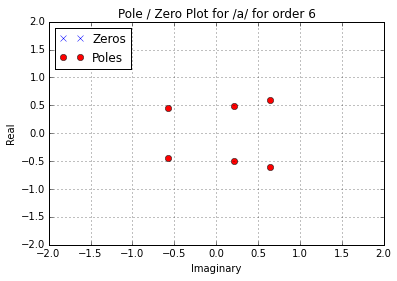

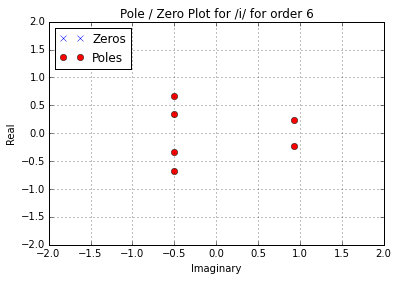

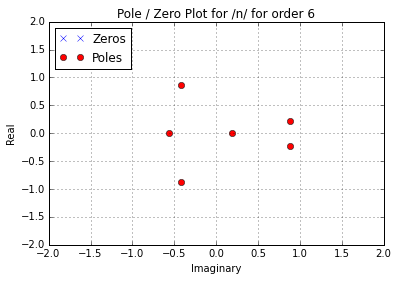

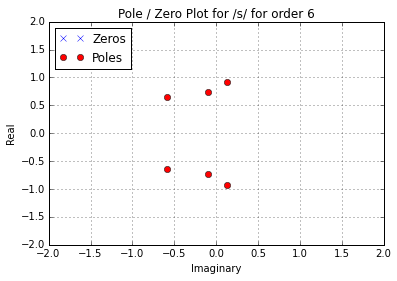

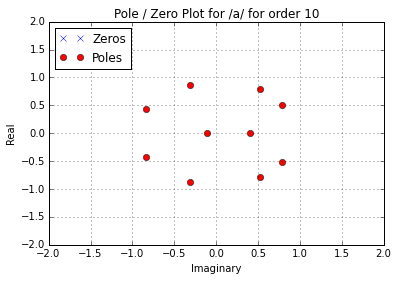

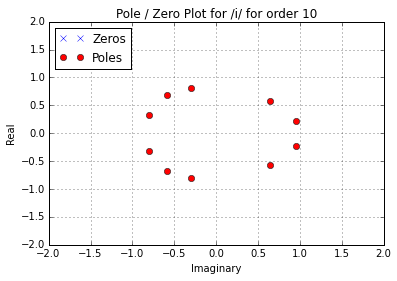

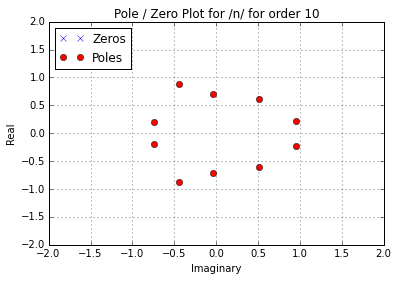

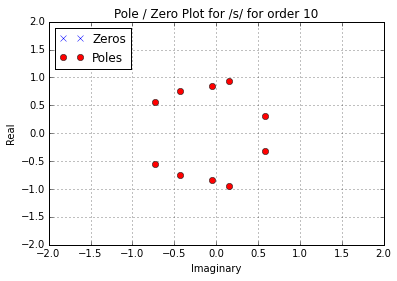

In [37]:
def poleZeroPlot(b,a, phone):
    a[1:len(a)] = -a[1:len(a)];
    b=[b]
    z, p, k = signal.tf2zpk(b, a)
    p = p[p!=0]
    fig = plt.figure()
    plt.plot(np.real(z), np.imag(z), 'xb')
    plt.plot(np.real(p), np.imag(p), 'or')
    plt.ylim((-2.0, 2.0))
    plt.xlim((-2.0,2.0))
    plt.legend(['Zeros', 'Poles'], loc=2)
    plt.title('Pole / Zero Plot for /'+phone+'/ for order '+str(len(p)))
    plt.ylabel('Real')
    plt.xlabel('Imaginary')
    plt.grid()

#LP Analysis
windowLength = 0.03;
GA, aA = LPanalysis(preEmphasizedA, 20, windowLength);
GI, aI = LPanalysis(preEmphasizedI, 20, windowLength);
GN, aN = LPanalysis(preEmphasizedN, 20, windowLength);
GS, aS = LPanalysis(preEmphasizedS, 20, windowLength);

# Pole-zero plot
poleZeroPlot(GA[6], aA[6], 'a')
poleZeroPlot(GI[6], aI[6], 'i')
poleZeroPlot(GN[6], aN[6], 'n')
poleZeroPlot(GS[6], aS[6], 's')
poleZeroPlot(GA[10], aA[10], 'a')
poleZeroPlot(GI[10], aI[10], 'i')
poleZeroPlot(GN[10], aN[10], 'n')
poleZeroPlot(GS[10], aS[10], 's')





(b) Compute the gain and plot the LPC spectrum magnitude (i.e. the dB magnitude frequency
response of the estimated all-pole filter) for each order "p". Superimpose each plot on the
narrowband dB magnitude spectrum of part 1 (after pre-emphasis). Comment on the
characteristics of the spectra

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Gain for /a/ for LP order  4  is  54479.5288737

LP coefficients for the same are
[ 1.          0.55018441 -0.16229987 -0.21250848 -0.23302842  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]


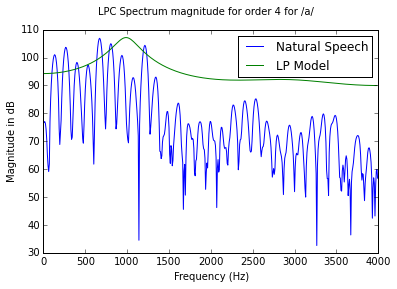

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Gain for /i/ for LP order  4  is  14468.8178503

LP coefficients for the same are
[ 1.          0.23555517  0.59578792  0.46119794 -0.50148461  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]


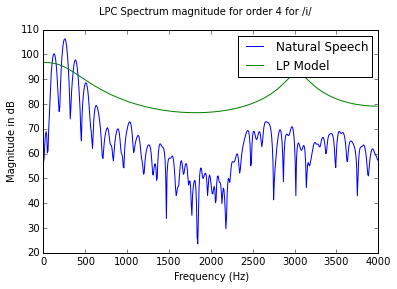

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Gain for /n/ for LP order  4  is  7865.83499933

LP coefficients for the same are
[ 1.          0.76245162 -0.15590907  0.85607303 -0.64087243  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]


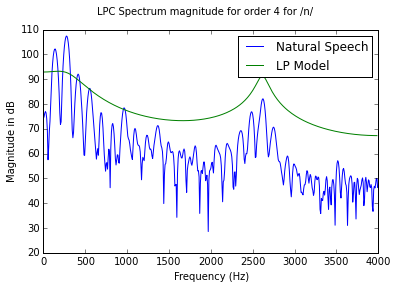

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:55: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:56: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Gain for /s/ for LP order  4  is  54479.5288737

LP coefficients for the same are
[ 1.         -0.87525762 -1.5449535  -0.83866419 -0.74713541  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]


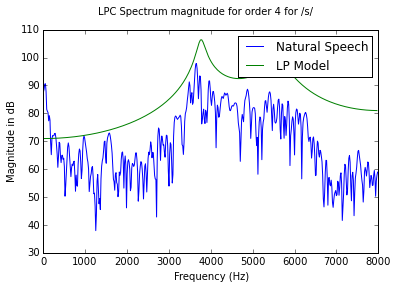

Gain for /a/ for LP order  6  is  54037.1235098

LP coefficients for the same are
[ 1.         -0.56702095  0.18269678  0.22886365  0.2773596  -0.11417147
  0.11792247 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]


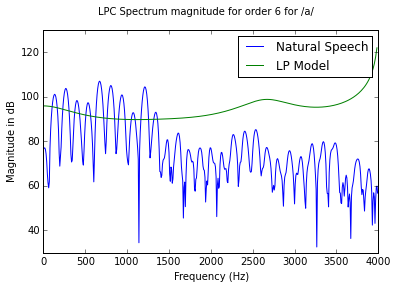

Gain for /i/ for LP order  6  is  12088.4753683

LP coefficients for the same are
[ 1.          0.14201386 -0.73908566 -0.94806814  0.1822039   0.51398201
  0.23997044 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]


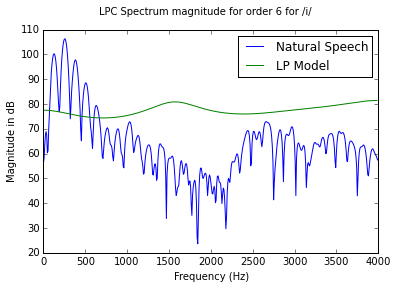

Gain for /n/ for LP order  6  is  7354.80539782

LP coefficients for the same are
[ 1.         -0.56849534 -0.17106657 -0.73720631  0.38816636  0.39006322
 -0.08087454 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]


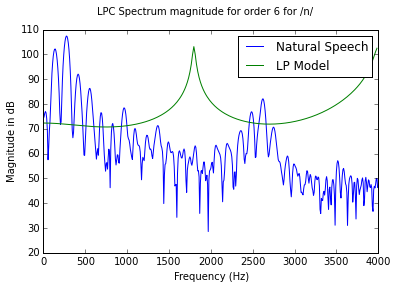

Gain for /s/ for LP order  6  is  54037.1235098

LP coefficients for the same are
[ 1.          1.09586182  2.04678862  1.56244882  1.54412529  0.57125736
  0.36416312 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]


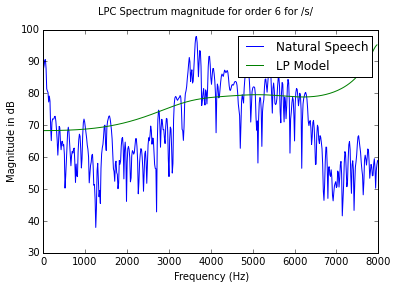

Gain for /a/ for LP order  8  is  44609.7097525

LP coefficients for the same are
[ 1.          0.5031555  -0.20792609 -0.20086087 -0.4660403  -0.04560628
 -0.16050476  0.21632494 -0.55889527  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.        ]


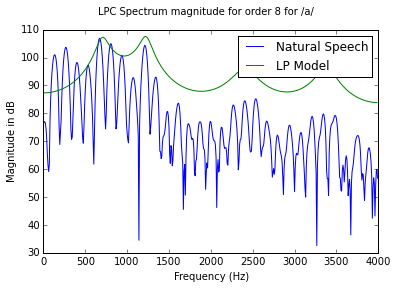

Gain for /i/ for LP order  8  is  11958.3267919

LP coefficients for the same are
[ 1.         -0.1019702   0.79718219  0.93969204 -0.32815842 -0.56211456
 -0.17693039  0.13030982 -0.05400557  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.        ]


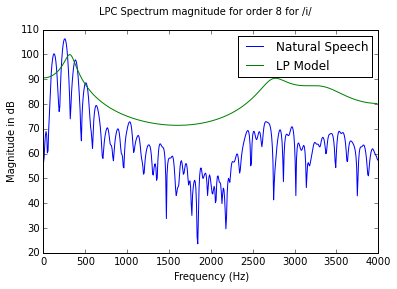

Gain for /n/ for LP order  8  is  6928.26565086

LP coefficients for the same are
[ 1.          0.54966834  0.08759495  0.57000679 -0.18475993 -0.24966128
  0.26275648 -0.22275373 -0.1421778   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.        ]


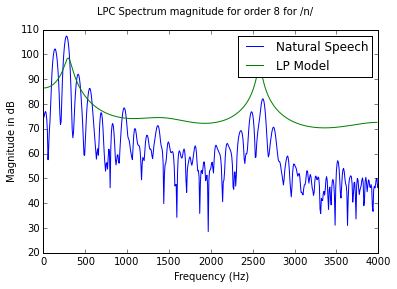

Gain for /s/ for LP order  8  is  44609.7097525

LP coefficients for the same are
[ 1.         -0.989743   -1.92701526 -1.21861115 -1.30319105 -0.22153353
 -0.30229513  0.12917038 -0.09881449  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.        ]


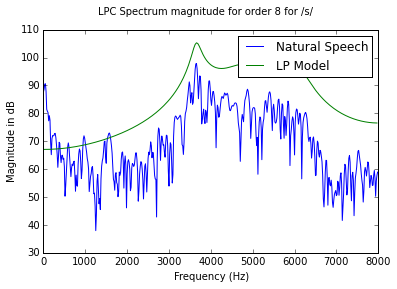

Gain for /a/ for LP order  10  is  43832.3460016

LP coefficients for the same are
[ 1.         -0.60125344  0.23078322  0.17794283  0.45442707 -0.03914499
  0.11160743 -0.25906577  0.64507378 -0.16831615 -0.02604392 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]


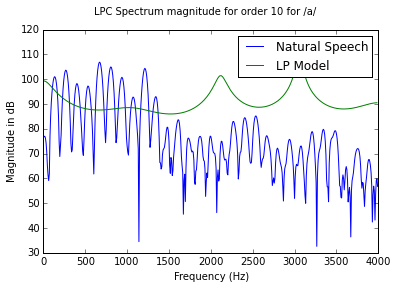

Gain for /i/ for LP order  10  is  11104.6939316

LP coefficients for the same are
[ 1.          0.17477883 -0.79856082 -0.99730597  0.43526674  0.82746634
  0.13639739 -0.57667448 -0.19180047  0.22948599  0.32285986 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]


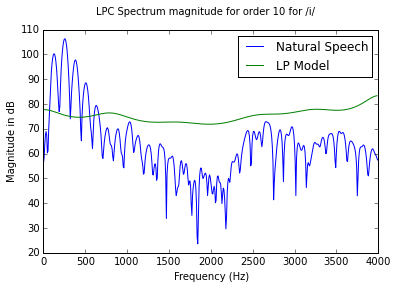

Gain for /n/ for LP order  10  is  6798.00078913

LP coefficients for the same are
[  1.00000000e+00  -5.21017719e-01  -5.15248343e-02  -5.57442960e-01
   1.53895818e-01   3.12064553e-01  -2.79548478e-01   1.13381572e-01
   8.03650275e-02   5.02711317e-05   1.70598446e-01  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00]


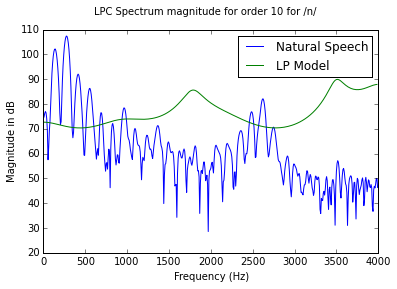

Gain for /s/ for LP order  10  is  43832.3460016

LP coefficients for the same are
[ 1.          0.94429461  1.93703258  1.08990946  1.28361179  0.00533547
  0.31990139 -0.24658812  0.27332933  0.0029812   0.17413866 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]


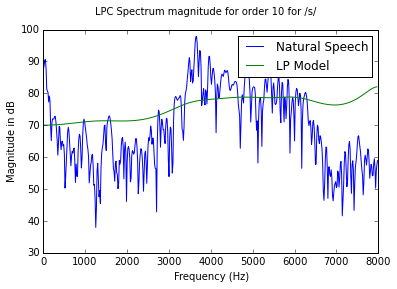

Gain for /a/ for LP order  12  is  43779.9717315

LP coefficients for the same are
[ 1.          0.60126684 -0.22247396 -0.20067448 -0.46044082  0.04068342
 -0.11280912  0.24106382 -0.66388201  0.15345636  0.04528051 -0.02607473
 -0.0257215   0.          0.          0.          0.          0.          0.
  0.          0.        ]


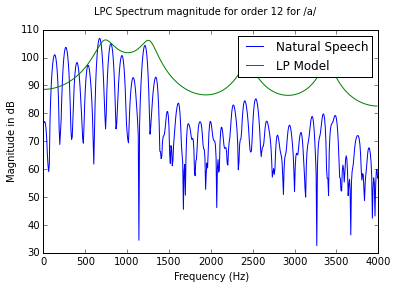

Gain for /i/ for LP order  12  is  10888.4116753

LP coefficients for the same are
[ 1.         -0.11587517  0.84951206  0.96803708 -0.54782489 -0.81488602
  0.02466659  0.67869306  0.00867219 -0.40583216 -0.30664403  0.19766783
  0.02124488  0.          0.          0.          0.          0.          0.
  0.          0.        ]


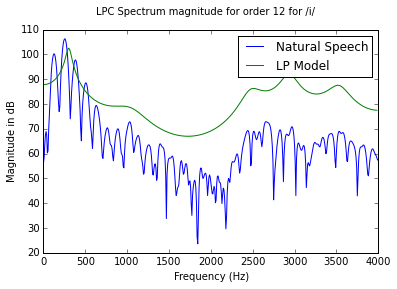

Gain for /n/ for LP order  12  is  6607.57741497

LP coefficients for the same are
[ 1.          0.53736778  0.00709663  0.56021247 -0.17315557 -0.3482455
  0.35993611 -0.182058   -0.13760845  0.12776049 -0.17983679  0.16295927
 -0.23167963  0.          0.          0.          0.          0.          0.
  0.          0.        ]


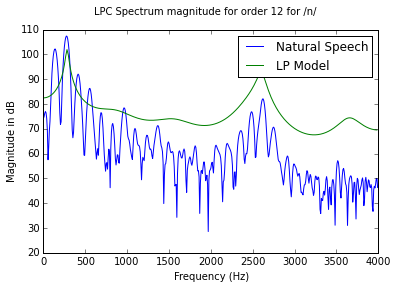

Gain for /s/ for LP order  12  is  43779.9717315

LP coefficients for the same are
[ 1.         -0.93971237 -1.94213493 -1.08254458 -1.29745148  0.01098296
 -0.3305629   0.27494491 -0.29275157  0.00318812 -0.21861096 -0.00965419
 -0.0337076   0.          0.          0.          0.          0.          0.
  0.          0.        ]


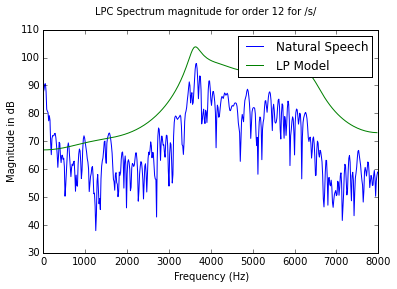

Gain for /a/ for LP order  20  is  42988.669108

LP coefficients for the same are
[ 1.          0.58827674 -0.21260853 -0.21722913 -0.4728946   0.04097665
 -0.10709264  0.24234    -0.73686881  0.15234079  0.08142127 -0.07771222
 -0.13974159 -0.01237809 -0.02024941  0.01550219 -0.1609521  -0.08342974
  0.04669448 -0.02408405 -0.12069058]


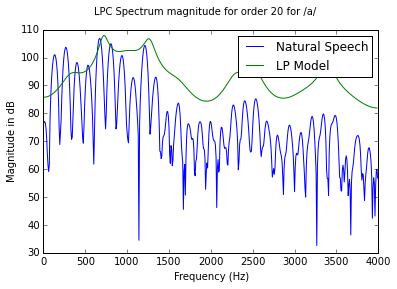

Gain for /i/ for LP order  20  is  10196.0003225

LP coefficients for the same are
[  1.00000000e+00  -1.57679083e-01   8.64868314e-01   1.00946152e+00
  -6.51723973e-01  -9.02724040e-01   1.44529632e-01   8.49486409e-01
  -2.03953721e-01  -7.28698232e-01  -2.13672144e-01   6.28393725e-01
  -3.60231146e-03  -4.16695527e-01  -1.41282327e-01   4.43817924e-01
   1.73851910e-01  -2.27090776e-01  -2.44053443e-01  -3.44869512e-04
   1.85255755e-02]


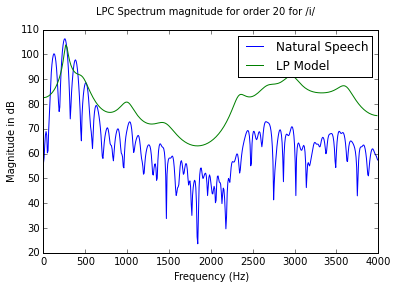

Gain for /n/ for LP order  20  is  6493.8983575

LP coefficients for the same are
[ 1.          0.52710569  0.01028584  0.52787311 -0.14864469 -0.36274932
  0.35759541 -0.19728679 -0.18423589  0.17643943 -0.23041539  0.09457113
 -0.18296932 -0.002514    0.07785799 -0.04542917  0.0178132   0.05025457
 -0.07533605 -0.05273454 -0.03736528]


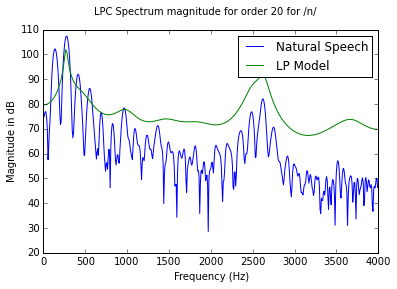

Gain for /s/ for LP order  20  is  42988.669108

LP coefficients for the same are
[ 1.         -0.99758296 -2.0391942  -1.25554367 -1.45354187 -0.16536567
 -0.39372587  0.19489128 -0.20682799  0.12351099  0.1985396   0.51228212
  0.7304408   0.71658217  0.70843831  0.47764121  0.31069131  0.15608463
  0.00465069 -0.01230524 -0.05236094]


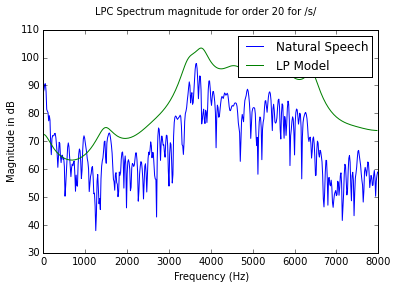

In [38]:
P = [4,6,8,10,12,20];
for p in P:
	#Printing the required Results for /a/    
	print("Gain for /a/ for LP order ",p," is ", GA[p]);
	print("\nLP coefficients for the same are");
	print(aA[p]);
	aA[p][1:len(aA[p])] = -aA[p][1:len(aA[p])]
	wA, hA = signal.freqz(GA[p], aA[p], None, 1);
	fig = plt.figure()
	plt.plot(frequency1A[:int(len(frequency1A)/2)], 20*np.log10(np.abs(preEmphasizedSpectrumA[:len(preEmphasizedSpectrumA)/2])))
	plt.plot(wA[:int(len(wA)/2)]*FsA/(2*pi), 20*np.log10(abs(hA[:len(hA)/2])))    
	fig.suptitle('LPC Spectrum magnitude for order '+str(p)+' for /a/')
	plt.ylabel('Magnitude in dB')
	plt.xlabel('Frequency (Hz)')
	plt.legend(['Natural Speech', 'LP Model'])
	plt.show()
    
	#Printing the required Results for /i/    
	print("Gain for /i/ for LP order ",p," is ", GI[p]);
	print("\nLP coefficients for the same are");
	print(aI[p]);
	aI[p][1:len(aI[p])] = -aI[p][1:len(aI[p])]
	wI, hI = signal.freqz(GI[p], aI[p], None, 1);
	fig = plt.figure()
	plt.plot(frequency1I[:int(len(frequency1I)/2)], 20*np.log10(np.abs(preEmphasizedSpectrumI[:len(preEmphasizedSpectrumI)/2])))
	plt.plot(wI[:int(len(wI)/2)]*FsI/(2*pi), 20*np.log10(abs(hI[:len(hI)/2])))    
	fig.suptitle('LPC Spectrum magnitude for order '+str(p)+' for /i/')
	plt.ylabel('Magnitude in dB')
	plt.xlabel('Frequency (Hz)')
	plt.legend(['Natural Speech', 'LP Model'])
	plt.show()

	#Printing the required Results for /n/    
	print("Gain for /n/ for LP order ",p," is ", GN[p]);
	print("\nLP coefficients for the same are");
	print(aN[p]);
	aN[p][1:len(aN[p])] = -aN[p][1:len(aN[p])]
	wN, hN = signal.freqz(GN[p], aN[p], None, 1);
	fig = plt.figure()
	plt.plot(frequency1N[:int(len(frequency1N)/2)], 20*np.log10(np.abs(preEmphasizedSpectrumN[:len(preEmphasizedSpectrumN)/2])))
	plt.plot(wN[:int(len(wN)/2)]*FsN/(2*pi), 20*np.log10(abs(hN[:len(hN)/2])))    
	fig.suptitle('LPC Spectrum magnitude for order '+str(p)+' for /n/')
	plt.ylabel('Magnitude in dB')
	plt.xlabel('Frequency (Hz)')
	plt.legend(['Natural Speech', 'LP Model'])
	plt.show()

	#Printing the required Results for /s/    
	print("Gain for /s/ for LP order ",p," is ", GA[p]);
	print("\nLP coefficients for the same are");
	print(aS[p]);
	aS[p][1:len(aS[p])] = -aS[p][1:len(aS[p])]
	wS, hS = signal.freqz(GS[p], aS[p], None, 1);
	fig = plt.figure()
	plt.plot(frequency1S[:int(len(frequency1S)/2)], 20*np.log10(np.abs(preEmphasizedSpectrumS[:len(preEmphasizedSpectrumS)/2])))
	plt.plot(wS[:int(len(wS)/2)]*FsS/(2*pi), 20*np.log10(abs(hS[:len(hS)/2])))    
	fig.suptitle('LPC Spectrum magnitude for order '+str(p)+' for /s/')
	plt.ylabel('Magnitude in dB')
	plt.xlabel('Frequency (Hz)')
	plt.legend(['Natural Speech', 'LP Model'])
	plt.show()


We see for order 12 and 20 the spectra for all the four phones are fitting well.
For order 6 and 10 none of the spectra are well fitting.
For 4 and  the spectra are moderately fitting.

(c) Plot error signal energy (i.e. square of gain) vs p.

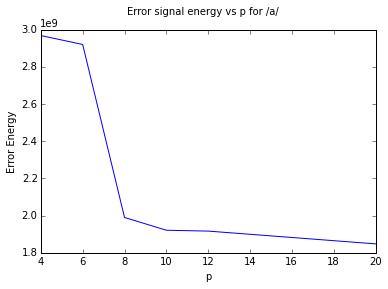

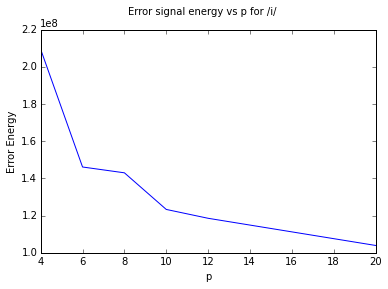

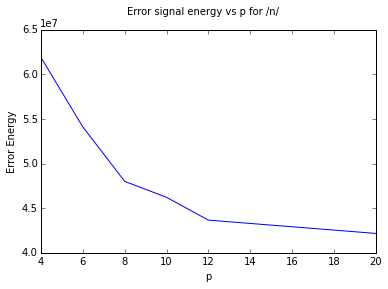

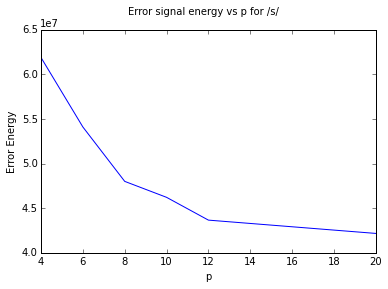

In [39]:
fig = plt.figure()
plt.plot(P,GA[P]*GA[P])
fig.suptitle('Error signal energy vs p for /a/')
plt.ylabel('Error Energy')
plt.xlabel('p')
plt.show()

fig = plt.figure()
plt.plot(P,GI[P]*GI[P])
fig.suptitle('Error signal energy vs p for /i/')
plt.ylabel('Error Energy')
plt.xlabel('p')
plt.show()

fig = plt.figure()
plt.plot(P,GN[P]*GN[P])
fig.suptitle('Error signal energy vs p for /n/')
plt.ylabel('Error Energy')
plt.xlabel('p')
plt.show()

fig = plt.figure()
plt.plot(P,GN[P]*GN[P])
fig.suptitle('Error signal energy vs p for /s/')
plt.ylabel('Error Energy')
plt.xlabel('p')
plt.show()

Cleary, error reduces with increasing number of poles.

<b>Question 3.</b> Based on the 10th-order LPCs, carry out the inverse filtering of the /a/ vowel segment and of the
unvoiced sound /s/. Obtain the residual error signal in each case. Can you measure the pitch
period of the voiced sound from the residual waveform? Use the acf to detect the pitch. Plot the
magnitude spectrum of each of the residual signals.


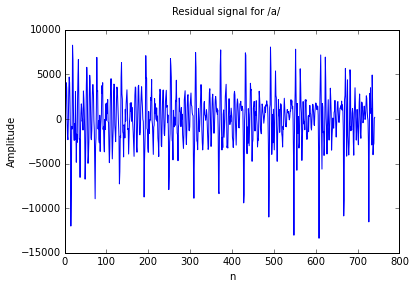

In [40]:
#Residual Signal for /a/
inverseFilteredSignalA = signal.lfilter(aA[10], GA[10], preEmphasizedA)
residualSignalA = preEmphasizedA[:] - inverseFilteredSignalA[:];
fig = plt.figure()
plt.plot(residualSignalA);
fig.suptitle('Residual signal for /a/')
plt.ylabel('Amplitude')
plt.xlabel('n')
plt.show();

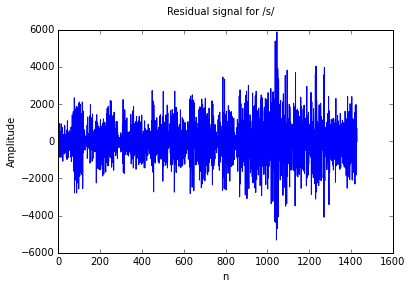

In [41]:
#Residual Signal for /s/
inverseFilteredSignalS = signal.lfilter(aS[10], GS[10], preEmphasizedS)
residualSignalS = preEmphasizedS[:] - inverseFilteredSignalS[:];
fig = plt.figure();
plt.plot(residualSignalS);
fig.suptitle('Residual signal for /s/')
plt.ylabel('Amplitude')
plt.xlabel('n')
plt.show();

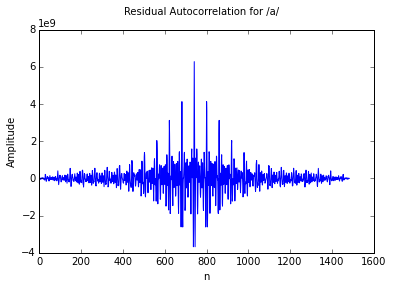

In [42]:
#Pitch Period
fig = plt.figure();
residualCorrelationA = np.correlate(residualSignalA,residualSignalA, mode = 'full')
plt.plot(residualCorrelationA);
fig.suptitle('Residual Autocorrelation for /a/')
plt.ylabel('Amplitude')
plt.xlabel('n')
plt.show();

The autocorrelation function for /a/ has peaks at around 60 samples interval. The sampling rate being 8kHz means that the pitch of the signal is 8000/60 = 133.33 Hz ~ 133 Hz.

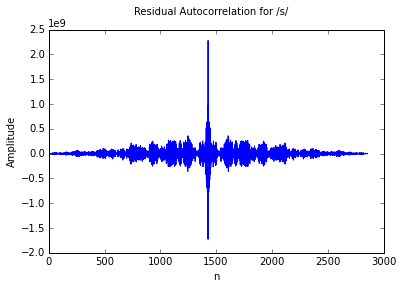

In [43]:
#Pitch Period
fig = plt.figure();
residualCorrelationS = np.correlate(residualSignalS,residualSignalS, mode = 'full')
plt.plot(residualCorrelationS);
fig.suptitle('Residual Autocorrelation for /s/')
plt.ylabel('Amplitude')
plt.xlabel('n')
plt.show();

/s/ being an unvoiced phone we cannot fins its pitch.

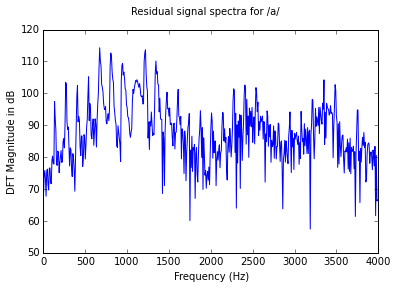

In [44]:
#Magnitude Spectrum of the residual signals
residualSpectrumA = np.fft.fft(residualSignalA, 1024);
residualFreqA = np.fft.fftfreq(residualSpectrumA.shape[-1], 1/float(FsA));
fig = plt.figure()
plt.plot(residualFreqA[:int(len(residualFreqA)/2)],20*np.log10(np.abs(residualSpectrumA[:int(len(residualSpectrumA)/2)])))
fig.suptitle('Residual signal spectra for /a/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.show()

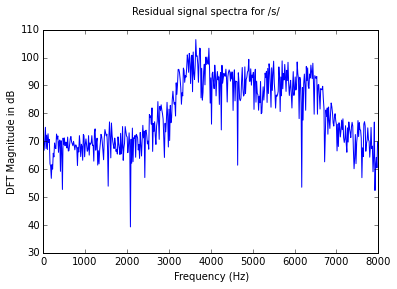

In [45]:
#Magnitude Spectrum of the residual signals
residualSpectrumS = np.fft.fft(residualSignalS, 1024);
residualFreqS = np.fft.fftfreq(residualSpectrumS.shape[-1], 1/float(FsS));
fig = plt.figure()
plt.plot(residualFreqS[:int(len(residualFreqS)/2)],20*np.log10(np.abs(residualSpectrumS[:int(len(residualSpectrumS)/2)])))
fig.suptitle('Residual signal spectra for /s/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.show()

<b>Question 4. </b>Next, we wish to resynthesize the phone sounds from the parameters of the source-filter model
obtained above for p=10: pitch, gain, LP coefficients. Use the LP filter estimated above, and an 
ideal impulse train input as source excitation (for the voiced sounds). Carry out de-emphasis on
the output waveform. For the unvoiced sound, use a white noise signal as source excitation. Set
the duration of the synthesized sound to be 300 ms at 8 kHz sampling frequency (use 16 kHz for
the /s/), and view/listen to your created sound. 


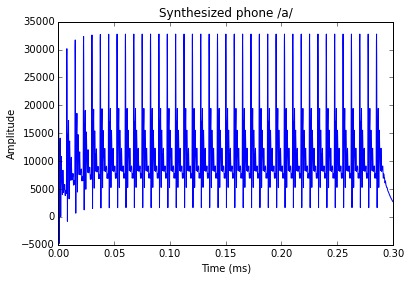

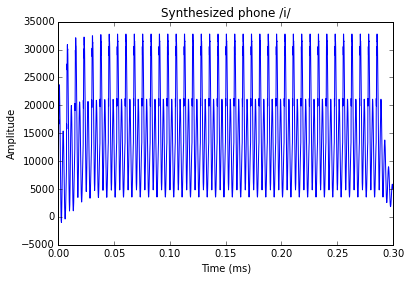

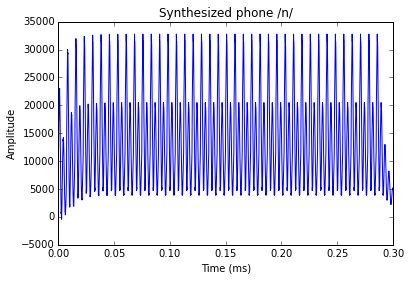

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


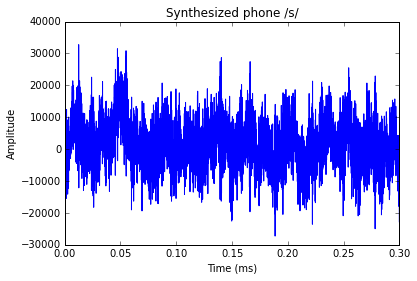

In [50]:
def resynthesizeVoicedPhone(pitch, duration, G, a, phone, Fs):
    x = np.zeros(int(duration*Fs))
    for i in range(0, int(duration*pitch)):
        x[i*int(np.floor(Fs/pitch))] = 1
    if (phone == 's'):
        x = np.random.normal(0, 1, duration*Fs)
    y = signal.lfilter([G],a,x);
    yDeEmphasized = signal.lfilter([1],[1, -0.985],y);
    resynthesizedPhone = np.int16(yDeEmphasized/np.max(np.abs(yDeEmphasized)) * 32767)
    timeSample = np.linspace(0, duration, duration*Fs, endpoint=False);
    plt.figure();
    plt.plot(timeSample, resynthesizedPhone)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.title('Synthesized phone /'+phone+'/')
    plt.show();
    return resynthesizedPhone
    
pitch = 133;
Fs = 8000;
p=10;
resynthesizedPhoneA = resynthesizeVoicedPhone(pitch, 0.3, GA[p], aA[p], 'a', Fs);
wav.write("resynthesizedPhoneA.wav", Fs, resynthesizedPhoneA)
resynthesizedPhoneI = resynthesizeVoicedPhone(pitch, 0.3, GI[p], aI[p], 'i', Fs);
wav.write("resynthesizedPhoneI.wav", Fs, resynthesizedPhoneI)
resynthesizedPhoneN = resynthesizeVoicedPhone(pitch, 0.3, GN[p], aN[p], 'n', Fs);
wav.write("resynthesizedPhoneN.wav", Fs, resynthesizedPhoneN)
p=18; Fs = 16000;
resynthesizedPhoneS = resynthesizeVoicedPhone(pitch, 0.3, GS[p], aS[p], 's', Fs);
wav.write("resynthesizedPhoneS.wav", Fs, resynthesizedPhoneS)

<b>Question 5.</b> Obtain the real cepstrum from a 30 ms segment for each of the phones (of the natural speech).
Use cepstral filtering to obtain the spectral envelope (dB) in each case. Compare it with the
corresponding LP (p=10) magnitude spectrum obtained previously by superposing both on the
actual magnitude spectrum of the windowed signal. Estimate the pitch of the segment from the
real cepstrum. (Obtain the vocal tract magnitude response of /s/ sampled at 16 kHz using LP
order = 18.)


C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


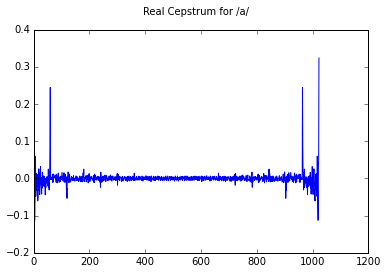

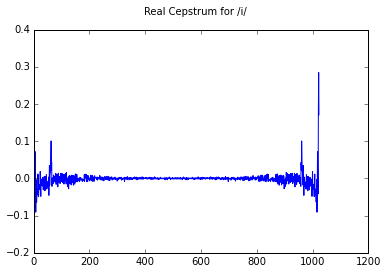

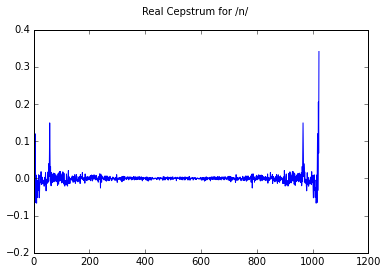

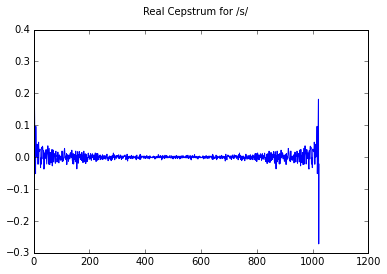

In [47]:
#Extracting 30ms segments
signalLength = 0.03  #0.03s
duration = signalA.shape[-1]
segmentA = signalA[(duration-int((signalLength)*FsA))/2.0:(duration+int((signalLength)*FsA))/2.0]*np.hamming(signalLength*FsA);
duration = signalI.shape[-1]
segmentI = signalI[(duration-int((signalLength)*FsI))/2.0:(duration+int((signalLength)*FsI))/2.0]*np.hamming(signalLength*FsI);
duration = signalN.shape[-1]
segmentN = signalN[(duration-int((signalLength)*FsN))/2.0:(duration+int((signalLength)*FsN))/2.0]*np.hamming(signalLength*FsN);
duration = signalS.shape[-1]
segmentS = signalS[(duration-int((signalLength)*FsS))/2.0:(duration+int((signalLength)*FsS))/2.0]*np.hamming(signalLength*FsS);

#Finding real Cepstrum
dftSegmentA = np.log10(np.abs(np.fft.fft(segmentA, 1024)))
cepstrumA = np.real(np.fft.ifft(dftSegmentA))
dftSegmentI = np.log10(np.abs(np.fft.fft(segmentI, 1024)))
cepstrumI = np.real(np.fft.ifft(dftSegmentI))
dftSegmentN = np.log10(np.abs(np.fft.fft(segmentN, 1024)))
cepstrumN = np.real(np.fft.ifft(dftSegmentN))
dftSegmentS = np.log10(np.abs(np.fft.fft(segmentS, 1024)))
cepstrumS = np.real(np.fft.ifft(dftSegmentS))

#plot cepstrum
fig = plt.figure()
plt.plot(cepstrumA)
plt.ylim((-0.2, 0.4))
fig.suptitle('Real Cepstrum for /a/')
plt.show()

fig = plt.figure()
plt.plot(cepstrumI)
plt.ylim((-0.2, 0.4))
fig.suptitle('Real Cepstrum for /i/')
plt.show()

fig = plt.figure()
plt.plot(cepstrumN)
plt.ylim((-0.2, 0.4))
fig.suptitle('Real Cepstrum for /n/')
plt.show()

fig = plt.figure()
plt.plot(cepstrumS)
plt.ylim((-0.3, 0.4))
fig.suptitle('Real Cepstrum for /s/')
plt.show()

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


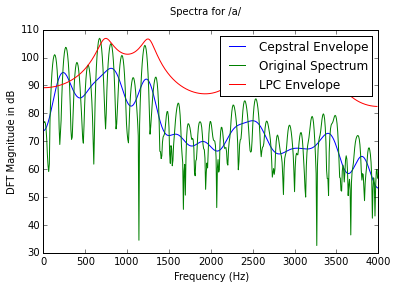

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


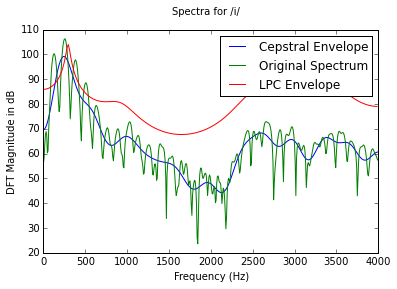

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:50: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:51: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


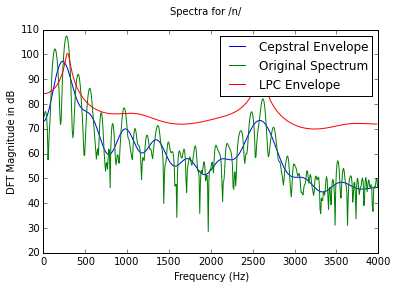

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:60: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


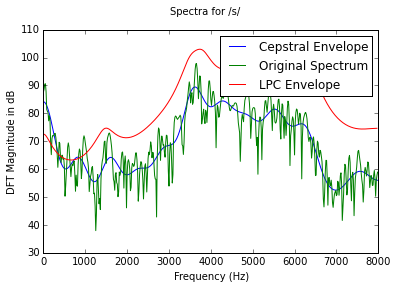

In [48]:
#Cepstral Filtering
Nc = 25
cepstrumA[Nc:(cepstrumA.shape[-1]-Nc)] = 0
cepstrumI[Nc:(cepstrumI.shape[-1]-Nc)] = 0
cepstrumN[Nc:(cepstrumN.shape[-1]-Nc)] = 0
cepstrumS[Nc:(cepstrumS.shape[-1]-Nc)] = 0

dftCepstrumA = np.abs(np.fft.fft(cepstrumA, 1024))
frequencyCepstrumA = np.fft.fftfreq(dftCepstrumA.shape[-1], 1/float(FsA))
dftCepstrumI = np.abs(np.fft.fft(cepstrumI, 1024))
frequencyCepstrumI = np.fft.fftfreq(dftCepstrumI.shape[-1], 1/float(FsI))
dftCepstrumN = np.abs(np.fft.fft(cepstrumN, 1024))
frequencyCepstrumN = np.fft.fftfreq(dftCepstrumN.shape[-1], 1/float(FsN))
dftCepstrumS = np.abs(np.fft.fft(cepstrumS, 1024))
frequencyCepstrumS = np.fft.fftfreq(dftCepstrumS.shape[-1], 1/float(FsS))

#LP model spectrum
p=10;
aA[p][1:len(aA[p])] = -aA[p][1:len(aA[p])]
wA, hA = signal.freqz(GA[p], aA[p], None, 1);
aI[p][1:len(aI[p])] = -aI[p][1:len(aI[p])]
wI, hI = signal.freqz(GI[p], aI[p], None, 1);
aN[p][1:len(aN[p])] = -aN[p][1:len(aN[p])]
wN, hN = signal.freqz(GN[p], aN[p], None, 1);
p=18;
aS[p][1:len(aS[p])] = -aS[p][1:len(aS[p])]
wS, hS = signal.freqz(GS[p], aS[p], None, 1);

fig = plt.figure()
plt.plot(frequencyCepstrumA[:len(frequencyCepstrumA)/2], 20*np.abs(dftCepstrumA[:len(dftCepstrumA)/2]))
plt.plot(frequencyCepstrumA[:len(frequencyCepstrumA)/2], 20*np.abs(dftSegmentA[:len(dftSegmentA)/2]))
plt.plot(wA[:int(len(wA)/2)]*FsA/(2*pi), 20*np.log10(abs(hA[:len(hA)/2])))    
fig.suptitle('Spectra for /a/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.legend(['Cepstral Envelope', 'Original Spectrum', 'LPC Envelope'])
plt.show()

fig = plt.figure()
plt.plot(frequencyCepstrumI[:len(frequencyCepstrumI)/2], 20*np.abs(dftCepstrumI[:len(dftCepstrumI)/2]))
plt.plot(frequencyCepstrumI[:len(frequencyCepstrumI)/2], 20*np.abs(dftSegmentI[:len(dftSegmentI)/2]))
plt.plot(wI[:int(len(wI)/2)]*FsI/(2*pi), 20*np.log10(abs(hI[:len(hI)/2])))    
fig.suptitle('Spectra for /i/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.legend(['Cepstral Envelope', 'Original Spectrum', 'LPC Envelope'])
plt.show()

fig = plt.figure()
plt.plot(frequencyCepstrumN[:len(frequencyCepstrumN)/2], 20*np.abs(dftCepstrumN[:len(dftCepstrumN)/2]))
plt.plot(frequencyCepstrumN[:len(frequencyCepstrumN)/2], 20*np.abs(dftSegmentN[:len(dftSegmentN)/2]))
plt.plot(wN[:int(len(wN)/2)]*FsN/(2*pi), 20*np.log10(abs(hN[:len(hN)/2])))    
fig.suptitle('Spectra for /n/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.legend(['Cepstral Envelope', 'Original Spectrum', 'LPC Envelope'])
plt.show()

fig = plt.figure()
plt.plot(frequencyCepstrumS[:len(frequencyCepstrumS)/2], 20*np.abs(dftCepstrumS[:len(dftCepstrumS)/2]))
plt.plot(frequencyCepstrumS[:len(frequencyCepstrumS)/2], 20*np.abs(dftSegmentS[:len(dftSegmentS)/2]))
plt.plot(wS[:int(len(wS)/2)]*FsS/(2*pi), 20*np.log10(abs(hS[:len(hS)/2])))    
fig.suptitle('Spectra for /s/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.legend(['Cepstral Envelope', 'Original Spectrum', 'LPC Envelope'])
plt.show()


<b> Question 6.</b> Next consider the synthetic signal (for /a/) generated from LP coefficients (p=10) and pulse train
in part 4. Compute the real cepstrum and obtain the spectral envelope (dB) via cepstral liftering.
Compare this estimated spectral envelope with the true LP magnitude spectrum. 

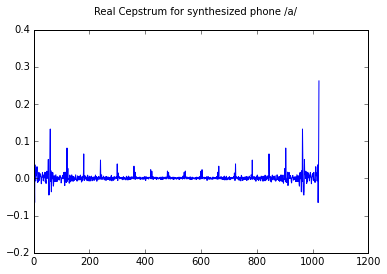

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


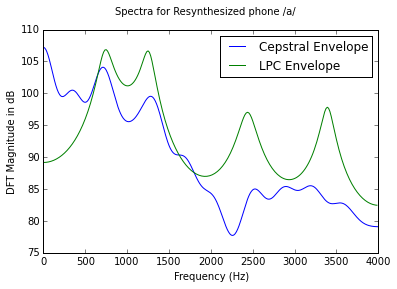

In [51]:
dftResynthesizedPhoneA = np.log10(np.abs(np.fft.fft(resynthesizedPhoneA, 1024)))
cepstrumResynthesizedPhoneA = np.real(np.fft.ifft(dftResynthesizedPhoneA))

#plot cepstrum
fig = plt.figure()
plt.plot(cepstrumResynthesizedPhoneA)
plt.ylim((-0.2, 0.4))
fig.suptitle('Real Cepstrum for synthesized phone /a/')
plt.show()

Nc = 25;
cepstrumResynthesizedPhoneA[Nc:(cepstrumResynthesizedPhoneA.shape[-1]-Nc)] = 0
Fs = 8000;
dftCepstrumResynthesizedPhoneA = np.abs(np.fft.fft(cepstrumResynthesizedPhoneA, 1024))
frequencyCepstrumResynthesizedPhoneA = np.fft.fftfreq(dftCepstrumResynthesizedPhoneA.shape[-1], 1/float(Fs))

fig = plt.figure()
plt.plot(frequencyCepstrumResynthesizedPhoneA[:len(frequencyCepstrumResynthesizedPhoneA)/2], 20*np.abs(dftCepstrumResynthesizedPhoneA[:len(dftCepstrumResynthesizedPhoneA)/2]))
plt.plot(wA[:int(len(wA)/2)]*FsA/(2*pi), 20*np.log10(abs(hA[:len(hA)/2])))   #for p =10 
fig.suptitle('Spectra for Resynthesized phone /a/')
plt.ylabel('DFT Magnitude in dB')
plt.xlabel('Frequency (Hz)')
plt.legend(['Cepstral Envelope', 'LPC Envelope'])
plt.show()